# Introduction to Principle Component Analysis 

While often the first unsupervised learning technique learned, principle component analysis requires perhaps a bit more care than other techniques we discussed so far (K-Means and Gaussian Mixtures) in order to fully understand and utilize.

At it's heart, Principle Component Analysis (or PCA) is a tool used to reduce the dimensionality of a dataset by picking out its most important aspects. In terms of Linear Algebra, we are trying to find a subspace of the data which captures most, if not all, aspects of the dataset. Lets say our data is three dimensional, but lies entirely on a two dimensional plane. In this case, we could find the "principle components" of this plane (i.e. the basis vectors), and represent our data in terms of those basis vectors. 

Lets see how this looks in practice...

In [1]:
%pylab inline 

X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

Populating the interactive namespace from numpy and matplotlib


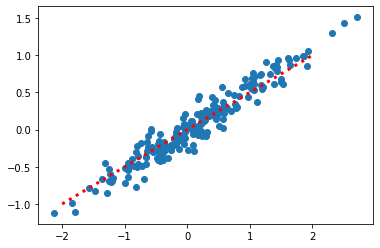

In [30]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot([-2,2],[-1,1],"r:",linewidth=3)

As you can see, the points are mostly oriented in the direction of the Y=2X line, so we really don't capture much information by saving the scatter away from this line. If we simply projected the data to the line we would have a more efficient representation of the data.

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [38]:
print(pca.components_)

[[0.87534317 0.48350215]]


In this case we found the true line direction is $\approx 0.87/0.48$ or 1.8. We can also find its second principle component...

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[ 0.61651048  0.7873467 ]
 [ 0.7873467  -0.61651048]]


In [51]:
#too many components.... errror!
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
print(pca.components_)

ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

We also have a variance in each direction, which expresses what fraction of the variation is in each direction.

In [43]:
print(pca.explained_variance_)

[0.98709511 0.0123229 ]


Perhaps unsurpisingly, since our data is two dimensional, the second component is orthogonal to the first!

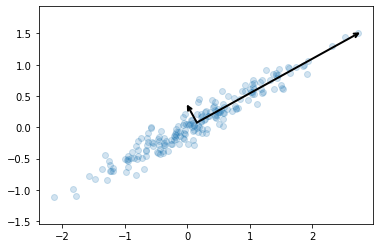

In [44]:
#pretty picture! :D

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

[(-3, 3.1),
 Text(0, 0.5, 'component 2'),
 (-5, 5),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'principal components')]

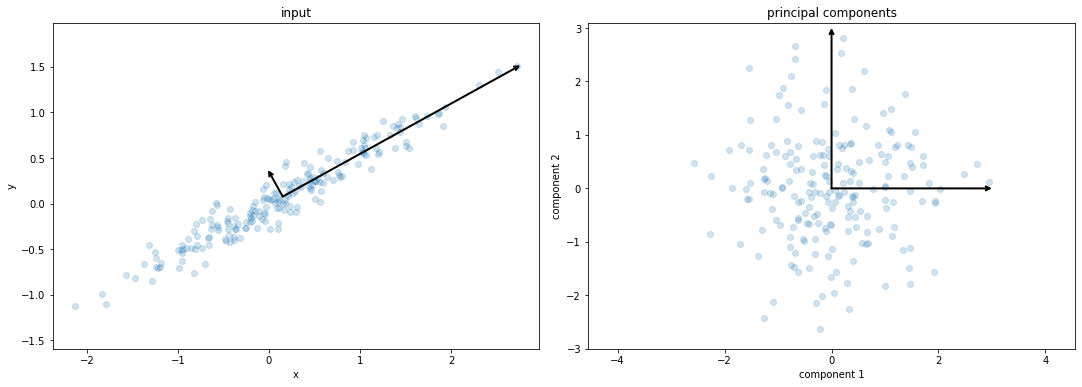

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1]/sqrt(0.0123229), alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

Above we rotated into the PCA basis, essentially maping our datapoints to a multivariable Gaussian. This transformation is known as an "affine transformation" which is a composition of translation, rotation, and uniform scaling.

We can reduce the dimensionality by zeroing out one of the components, i.e. projecting downward.

In [53]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


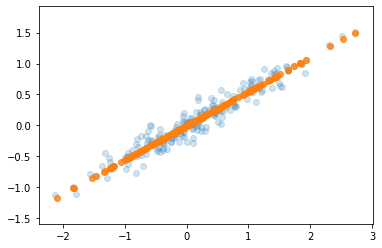

In [55]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2) #og data
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8) #projected data
plt.axis('equal');

## Lets use this for dealing with higher dimensional data!

Like handwrittent digits!

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

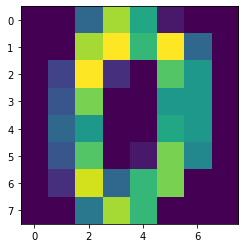

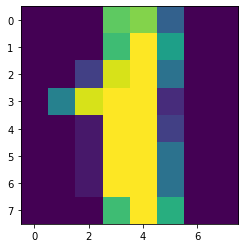

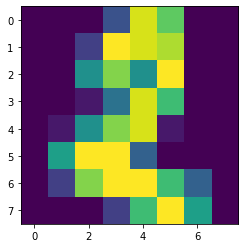

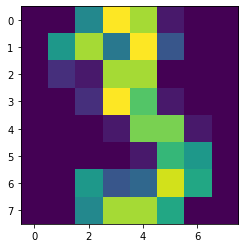

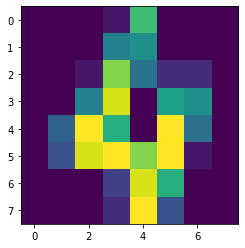

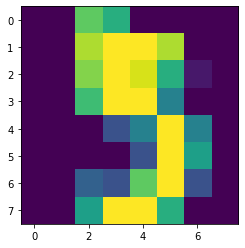

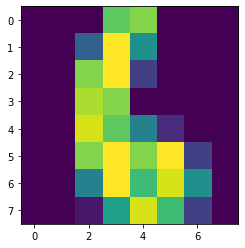

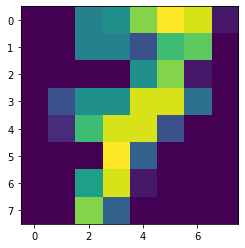

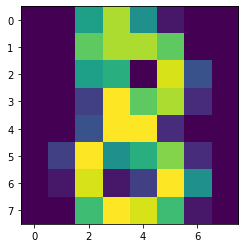

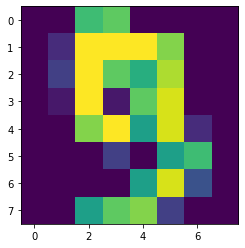

In [3]:
for i in range(0,10):
    imshow(digits.data[i].reshape(8,8))
    plt.show()

In [6]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


So we just reduced the dimensionality from 64 to 2!

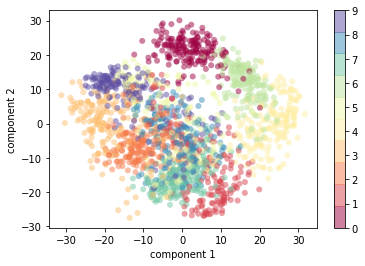

In [7]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

# PCA as a Noise Filtering Technique

Since PCA only picks up on whats important, it can also downweight what is not important!

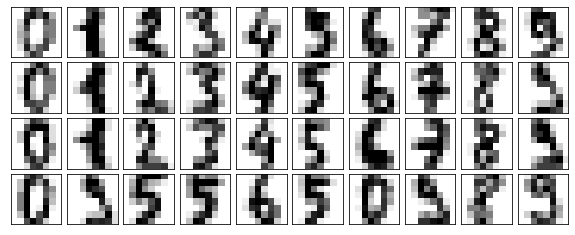

In [8]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

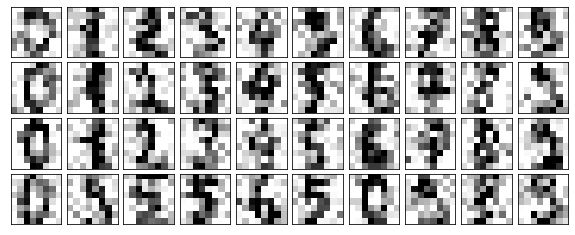

In [9]:
#adding random noise...
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [10]:
pca = PCA(12).fit(noisy) #fitting PCA
pca.n_components_ #number of components fit...

12

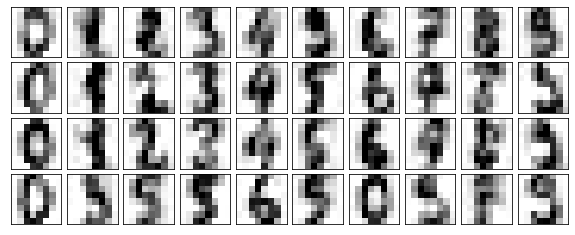

In [11]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered) #less noisy! :D

## Classification using PCA!

In [15]:
from sklearn import metrics
from sklearn.cluster import KMeans
from time import time

digits = load_digits()
data = digits.data

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

#some random metrics to see how well things are doing! We will play around with them during the breakout...
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_,
                                                average_method='arithmetic'),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)


n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.17s	1168926	0.743	0.750	0.746	0.677	0.744	0.176
random   	0.16s	1165233	0.739	0.748	0.743	0.669	0.741	0.169
PCA-based	0.05s	1188310	0.784	0.787	0.785	0.741	0.783	0.176


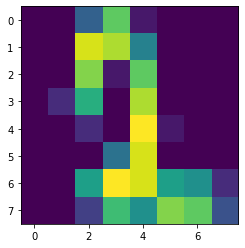

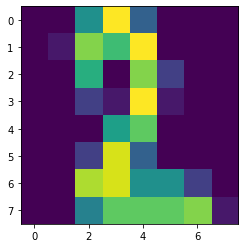

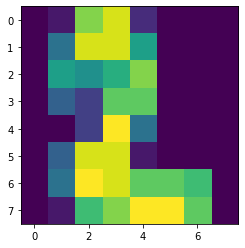

In [16]:
labels_out = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1).fit(data).labels_

for i in range(0,100):
    if labels_out[i]==2:
        imshow(data[i].reshape(8,8))
        plt.show()

Very good! :D Need to map them to the true digits, rather than just the random cluster labels...

In [17]:
from scipy.stats import mode

labels_out = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1).fit(data).labels_

labels_a = np.zeros_like(labels_out)

for i in range(10):
    mask = (labels_out == i)
    labels_a[mask] = mode(digits.target[mask])[0] #get most common number in the mapped list (assuming >50% accuracy)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels_a)

0.8697829716193656

Great! We got 87% accuracy or so! :D Lets see where the model most often gets confused...

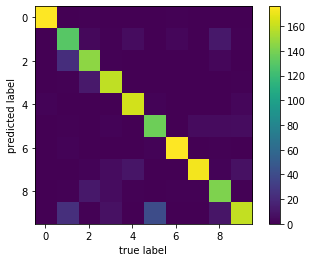

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels_a)
imshow(mat.T)
plt.colorbar()

plt.xlabel('true label')
plt.ylabel('predicted label');

Confusion matrix, without normalization
[[176   0   0   0   2   0   0   0   0   0]
 [  0 130  23   1   0   1   2   0   1  24]
 [  1   4 146  12   0   0   0   2  11   1]
 [  0   1   1 159   0   2   0   6   6   8]
 [  0   6   0   0 164   0   0  10   1   0]
 [  0   0   0   0   2 137   2   0   0  41]
 [  1   3   0   0   0   0 176   0   1   0]
 [  0   0   0   0   0   5   0 173   1   0]
 [  0  11   3   0   0   5   1   2 142  10]
 [  0   1   0   1   3   6   0   8   1 160]]


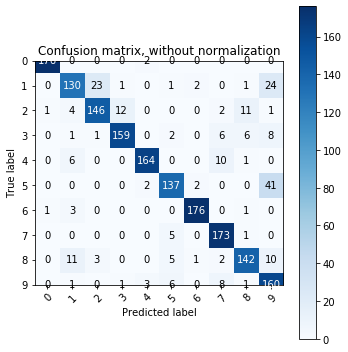

In [21]:
#or a bit prettier....

from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(5,5))    

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(digits.target, labels_a, classes=np.array(["0","1","2","3","4","5","6","7","8","9","10"]),
                      title='Confusion matrix, without normalization')


Still kinda ugly, but maybe you can fix it? :P It is copied from [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)